### Problem statement : Automotive vehicles engine health prediction for maintenance

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,\
                            precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

#### Step 1 : Data Gathering

Engine rpm: Revolutions per minute of the engine.
    
Lub oil pressure: Pressure exerted by lubricating oil within the engine.
    
Fuel pressure: Pressure of the fuel supply to the engine.
    
Coolant pressure: Pressure of the engine coolant system.
    
Lub oil temp: Temperature of the lubricating oil.
    
Coolant temp: Temperature of the engine coolant.
    
Engine Condition: Indicates the health state of the engine (0 = unhealthy, 1 = healthy).

In [2]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Machine Learning/automotive_engine_health_prediction-main/automotive_engine_health_prediction-main/engine_data.csv')
df.head(10)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


### Step 2:EDA - Read and Explore the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [4]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [5]:
df.isna().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

In [6]:
df['Engine Condition'].value_counts()

1    12317
0     7218
Name: Engine Condition, dtype: int64

#### Checking data for Outliers

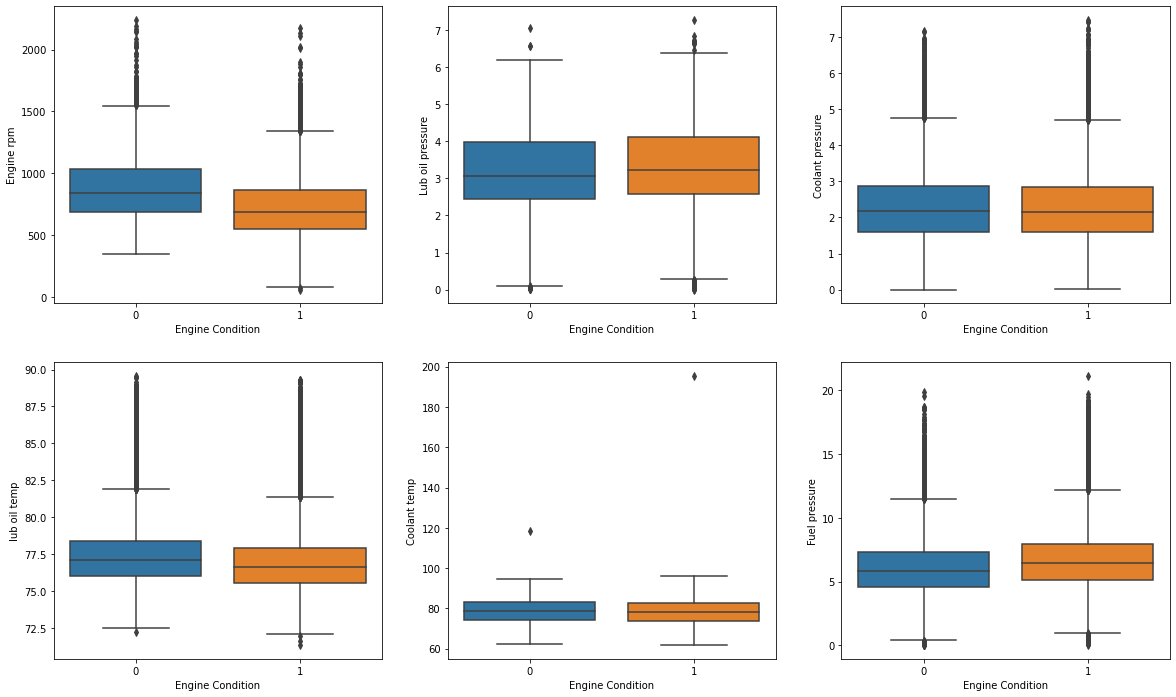

In [21]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(y = 'Engine rpm',x ='Engine Condition',data =df)
plt.subplot(2,3,2)
sns.boxplot(y = 'Lub oil pressure',x ='Engine Condition',data =df)
plt.subplot(2,3,3)
sns.boxplot(y = 'Coolant pressure',x ='Engine Condition',data =df)
plt.subplot(2,3,4)
sns.boxplot(y = 'lub oil temp',x ='Engine Condition',data =df)
plt.subplot(2,3,5)
sns.boxplot(y = 'Coolant temp',x ='Engine Condition',data =df)
plt.subplot(2,3,6)
sns.boxplot(y = 'Fuel pressure',x ='Engine Condition',data =df)


plt.show()

### Step 3: Train Test split the data

In [7]:
def train_test_split_and_features(df):
    y = df["Engine Condition"]
    x = df.drop(['Engine Condition'], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features

In [8]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df)

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  
0     84.144163     81.632187  
1     77.640934     82.445724  
2     77.752266     79.645777  
3     74.129907     71.774629  
4     78.396989     87.000225  
Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp'],
      dtype='object')


### Step 4: Fit and evaluate model

In [9]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    random_forest =  RandomForestClassifier(random_state=0,\
                                            max_depth=5,\
                                            min_samples_split=0.05,\
                                            min_samples_leaf=10,\
                                            max_features='log2',\
                                            n_estimators=50,\
                                            criterion = 'entropy'
                                            )

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    random_forest_precision_score = precision_score(y_test,random_forest_predict)
    random_forest_recall_score = recall_score(y_test,random_forest_predict)
    random_forest_f1_score = f1_score(y_test,random_forest_predict)
    print("confusion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    print("Precision score of Random Forest:",random_forest_precision_score*100,'\n')
    print("Recall score of Random Forest:",random_forest_recall_score*100,'\n')
    print("f1 score of Random Forest:",random_forest_f1_score*100,'\n')
    return model

In [10]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confusion matrix
[[ 354 1057]
 [ 242 2254]]


Accuracy of Random Forest: 66.75198361914512 

              precision    recall  f1-score   support

           0       0.59      0.25      0.35      1411
           1       0.68      0.90      0.78      2496

    accuracy                           0.67      3907
   macro avg       0.64      0.58      0.56      3907
weighted avg       0.65      0.67      0.62      3907

Precision score of Random Forest: 68.07610993657505 

Recall score of Random Forest: 90.30448717948718 

f1 score of Random Forest: 77.63044601343206 



### Step 5: Try different parameters to identify best ones

In [11]:
param_grid = [
  {'max_depth': [5,7,9,12,15], 'min_samples_split': [0.02,0.03,0.05,0.07,0.09,], 
'min_samples_leaf': [20,25,30,35,45],'n_estimators':[40,45,55,70,75],'criterion':['entropy','gini', 'log_loss'],
'max_features': ['sqrt', 'log2', 'None']}]

In [12]:
#model = RandomForestClassifier()
#search = GridSearchCV(estimator = model, param_grid = param_grid, cv=10,verbose=10)
#search.fit(x_train, y_train)

In [13]:
model = RandomForestClassifier()
search = RandomizedSearchCV (estimator = model, param_distributions = param_grid, cv=5,random_state=100,n_iter=10, verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'criterion': ['entropy', 'gini',
                                                       'log_loss'],
                                         'max_depth': [5, 7, 9, 12, 15],
                                         'max_features': ['sqrt', 'log2',
                                                          'None'],
                                         'min_samples_leaf': [20, 25, 30, 35,
                                                              45],
                                         'min_samples_split': [0.02, 0.03, 0.05,
                                                               0.07, 0.09],
                                         'n_estimators': [40, 45, 55, 70, 75]}],
                   random_state=100, verbose=5)

In [14]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.134477,9.582020e-03,0.022120,0.007468,75,0.02,30,log2,15,entropy,"{'n_estimators': 75, 'min_samples_split': 0.02...",0.675944,0.669546,0.681382,0.66464,0.65184,0.668670,0.010146,1
7,0.388671,6.483910e-03,0.015636,0.000017,40,0.02,30,log2,9,gini,"{'n_estimators': 40, 'min_samples_split': 0.02...",0.672105,0.662828,0.682022,0.66304,0.65408,0.666815,0.009503,2
5,0.809149,1.967130e-02,0.018754,0.006246,55,0.02,30,sqrt,9,entropy,"{'n_estimators': 55, 'min_samples_split': 0.02...",0.674984,0.658669,0.677543,0.66880,0.65376,0.666751,0.009193,3
1,0.833994,1.684101e-02,0.016573,0.001364,75,0.02,35,sqrt,5,entropy,"{'n_estimators': 75, 'min_samples_split': 0.02...",0.662508,0.663148,0.673385,0.66528,0.65568,0.664000,0.005690,4
3,0.287132,1.146228e-02,0.009841,0.007210,40,0.07,20,sqrt,5,gini,"{'n_estimators': 40, 'min_samples_split': 0.07...",0.665387,0.663788,0.662188,0.66208,0.65664,0.662017,0.002947,5
0,0.019314,6.287814e-03,0.000000,0.000000,55,0.02,30,log2,5,log_loss,"{'n_estimators': 55, 'min_samples_split': 0.02...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,0.015625,4.862804e-07,0.000000,0.000000,40,0.02,45,None,5,entropy,"{'n_estimators': 40, 'min_samples_split': 0.02...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,0.025377,8.006752e-03,0.000000,0.000000,75,0.09,20,sqrt,7,log_loss,"{'n_estimators': 75, 'min_samples_split': 0.09...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
6,0.009375,7.654694e-03,0.000000,0.000000,40,0.03,45,log2,12,log_loss,"{'n_estimators': 40, 'min_samples_split': 0.03...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.015617,1.435953e-05,0.000000,0.000000,45,0.02,20,None,7,log_loss,"{'n_estimators': 45, 'min_samples_split': 0.02...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [15]:
results_save = pd.DataFrame(search.cv_results_)
results_save.to_csv("results_save.csv", index =False)

In [16]:
search.best_params_

{'n_estimators': 75,
 'min_samples_split': 0.02,
 'min_samples_leaf': 30,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'entropy'}

### Step 6: Evaluate the model with best parameters

In [18]:
model= RandomForestClassifier(max_depth=15, 
                              max_features='log2', 
                              min_samples_leaf=30, 
                              min_samples_split=0.02,
                              n_estimators=75,
                              criterion='entropy') 
model.fit(x_train, y_train) 
y_pred_grid = model.predict(x_test) 
print(classification_report(y_pred_grid, y_test)) 
random_forest_conf_matrix = confusion_matrix(y_test, y_pred_grid)
random_forest_acc_score = accuracy_score(y_test, y_pred_grid)
random_forest_precision_score = precision_score(y_test,y_pred_grid)
random_forest_recall_score = recall_score(y_test,y_pred_grid)
random_forest_f1_score = f1_score(y_test,y_pred_grid)
print("confusion matrix")
print(random_forest_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
print("Precision score of Random Forest:",random_forest_precision_score*100,'\n')
print("Recall score of Random Forest:",random_forest_recall_score*100,'\n')
print("f1 score of Random Forest:",random_forest_f1_score*100,'\n')

              precision    recall  f1-score   support

           0       0.35      0.58      0.44       856
           1       0.85      0.70      0.77      3051

    accuracy                           0.67      3907
   macro avg       0.60      0.64      0.60      3907
weighted avg       0.74      0.67      0.70      3907

confusion matrix
[[ 494  917]
 [ 362 2134]]


Accuracy of Random Forest: 67.26388533401587 

Precision score of Random Forest: 69.9442805637496 

Recall score of Random Forest: 85.49679487179486 

f1 score of Random Forest: 76.94249143681269 



### Step 7 : Feature importance

In [19]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

<BarContainer object of 6 artists>

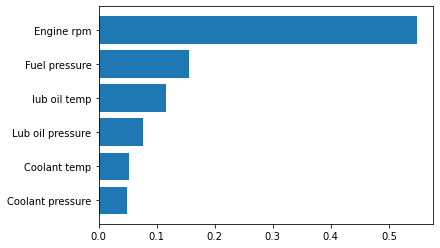

In [20]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)